# NLP-6: Term frequency and Inverse document frequency (TF-IDF)
#### Credit:
https://www.youtube.com/watch?v=z9myrLOF_1M&list=PLZoTAELRMXVMdJ5sqbCK2LiM0HhQVWNzm&index=9

## Term Frequency (TF)
It is the ratio of the occurrence of the word (w) in document (d) per the total number of words in the documents. With this simple formulation, we are measuring the frequency of a word in the document.

For example, if the sentence has 6 words and contains two “the”, the TF ratio of this word would be (2/6).

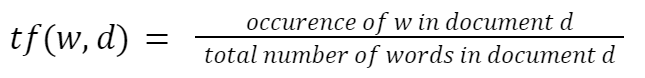

## Inverse Document Frequency (IDF)

IDF calculates the importance of a word in a corpus D. The most frequently used words like “of, we, are” have little to no significance. It is calculated by dividing the total number of documents in the corpus by the number of documents containing the word.

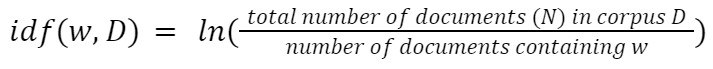

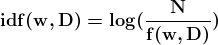

## Term Frequency Inverse Document Frequency (TFIDF)

TF-IDF is the product of term frequency and inverse document frequency. It gives more importance to the word that is rare in the corpus and common in a document.

image.png

In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [2]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [3]:
paragraph="""I have three visions for India. In 3000 years of our history, people from all over the world have come and invaded us, captured our lands, conquered our minds.
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British, the French, the Dutch, all of them came and looted us, took over what was ours.
               Yet we have not done this to any other nation. We have not conquered anyone.
               We have not grabbed their land, their culture, their history and tried to enforce our way of life on them.
               Why? Because we respect the freedom of others.That is why my first vision is that of freedom. I believe that India got its first vision of this in 1857, when we started the War of Independence. It is this freedom that we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India stands up to the world, no one will respect us. Only strength respects strength. We must be strong not only as a military power but also as an economic power. Both must go hand-in-hand.
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life.
               I see four milestones in my career."""

In [4]:
wnl = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []

#### Cleaning and Preprocessing data

#### re.sub(pattern, repl, string, count=0, flags=0)

**pattern** is a regular expression that you want to match. Besides a regular expression, the pattern can be Pattern object.<br>
**repl** is the replacement<br>
**string** is the input string<br>

**[^a-zA-Z]** :
* matches a single character not in the range between a (index 97) to z (index 122) (case sensitive) and between A (index 65) to Z (index 90) (case sensitive)

In [5]:
for i in range(len(sentences)):
  review = re.sub('[^a-zA-Z]', ' ', sentences[i])
  review = review.lower()
  review = review.split() # Split a string into a list where each word is a list item
  review = [wnl.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

In [6]:
corpus

['three vision india',
 'year history people world come invaded u captured land conquered mind',
 'alexander onwards greek turk mogul portuguese british french dutch came looted u took',
 'yet done nation',
 'conquered anyone',
 'grabbed land culture history tried enforce way life',
 '',
 'respect freedom others first vision freedom',
 'believe india got first vision started war independence',
 'freedom must protect nurture build',
 'free one respect u',
 'second vision india development',
 'fifty year developing nation',
 'time see developed nation',
 'among top nation world term gdp',
 'percent growth rate area',
 'poverty level falling',
 'achievement globally recognised today',
 'yet lack self confidence see developed nation self reliant self assured',
 'incorrect',
 'third vision',
 'india must stand world',
 'believe unless india stand world one respect u',
 'strength respect strength',
 'must strong military power also economic power',
 'must go hand hand',
 'good fortune worked

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25883507, 0.30512561,
        0.        ],
       [0.        , 0.28867513, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [8]:
print(X.shape) # rows x columns
print(X.size)

(31, 114)
3534
